In [55]:
if (!require(pacman)) {
  install.packages("pacman")
  library(pacman)
}

p_load(reticulate)


In [56]:
py_run_string("import os")

In [57]:
py_run_string("os.system('sudo apt-get install libfftw3-dev')")

In [58]:
p_load(
    readxl, writexl, e1071, KbMvtSkew, qqplotr, tidyverse
)

In [59]:
dados <- read_excel("dados.xlsx")
glimpse(dados)

Rows: 1,430
Columns: 2
$ x <dbl> 9.38, 8.78, 7.93, 10.64, 9.54, 9.57, 11.93, 11.49, 11.97, 9.97, 11.1…
$ y <dbl> 0.56, 9.02, 1.33, 8.16, 1.80, 1.99, 8.73, 0.27, 0.93, 24.51, 1.37, 1…


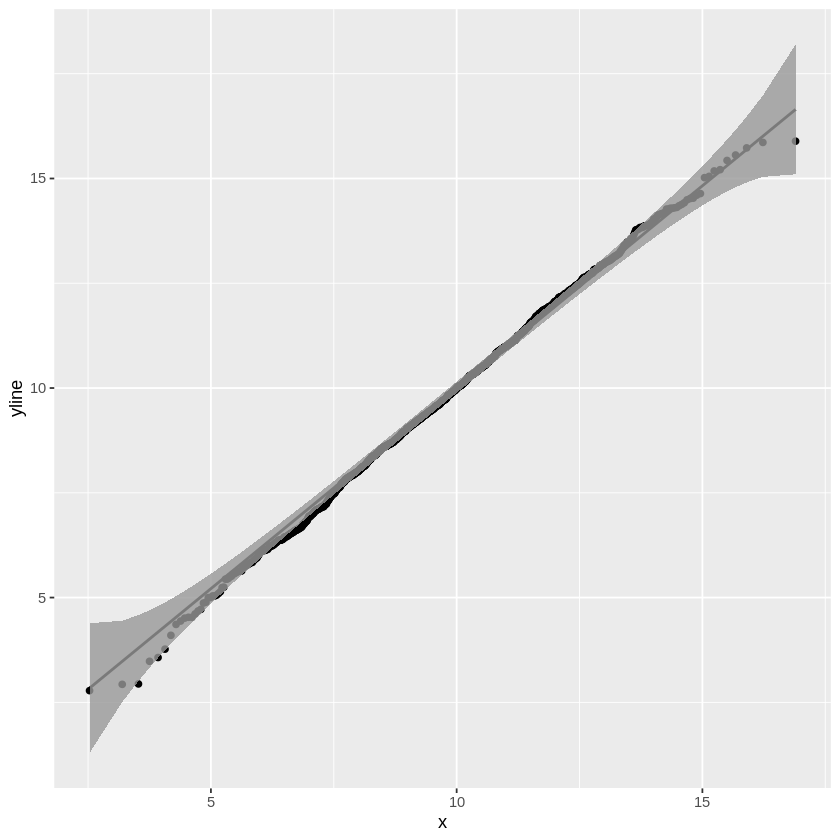

In [60]:
ggplot(dados, aes(sample=x)) +
  stat_qq_point() +
  stat_qq_line() +
  stat_qq_band()

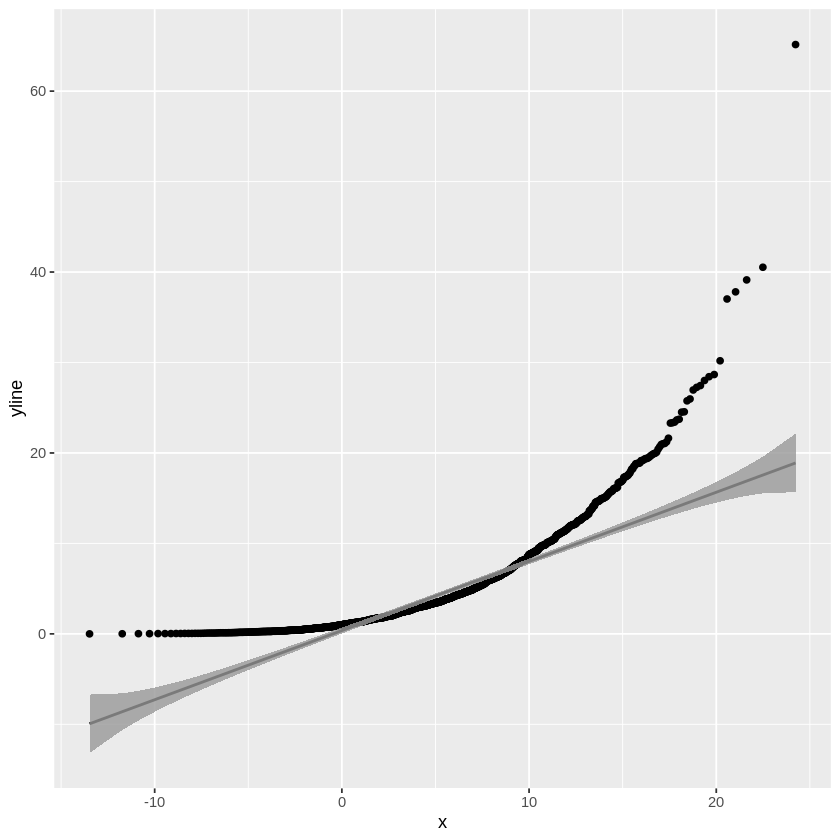

In [61]:
ggplot(dados, aes(sample=y)) +
  stat_qq_point() +
  stat_qq_line() +
  stat_qq_band()

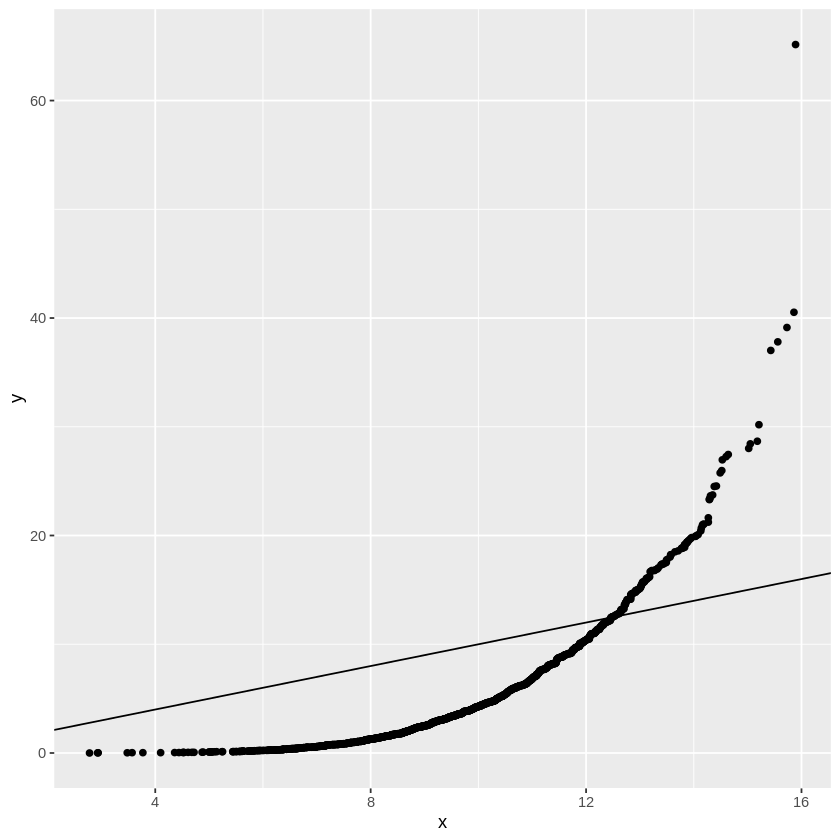

In [62]:
df <- tibble(
  x = sort(dados$x),
  y = sort(dados$y)
)
ggplot(df, aes(x, y)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1)

In [63]:
tabela <- summarise(
  dados,
  media_x = mean(x),
  media_y = mean(y),
  dp_x = sd(x),
  dp_y = sd(y),
  B_x = BowleySkew(x),
  B_y = BowleySkew(y),
  G1_x = skewness(x, type = 2),
  G1_y = skewness(y, type = 2),
  G2_x = kurtosis(x, type = 2),
  G2_y = kurtosis(y, type = 2)
)
tabela

media_x,media_y,dp_x,dp_y,B_x,B_y,G1_x,G1_y,G2_x,G2_y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.713189,5.378559,2.119564,5.564944,0.03184713,0.2836601,-0.04495496,2.631858,-0.06139451,13.93414


In [64]:
write_xlsx(tabela, "tabela.xlsx")